# Proyek Analisis Data: Bike-sharing-dataset
- **Nama:** Ananda Kelvin Power Situmorang
- **Email:** anandakelvinsitumorang2001@gmail.com
- **ID Dicoding:** MC319D5Y1574

## Menentukan Pertanyaan Bisnis

- Bagaimana tren peminjaman sepeda di tahun 2011 dan 2012?
- Musim apa yang paling banyak dan paling sedikit orang menyewa sepeda?
- Apakah musim dan cuaca mempengaruhi pola jumlah peminjaman?
- Dalam sehari, pada waktu kapan terjadi peminjaman tertinggi dan terendah?

## Import Semua Packages/Library yang Digunakan

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [53]:
df_day= pd.read_csv("/content/sample_data/day.csv")
df_hour = pd.read_csv("/content/sample_data/hour.csv")

df_day.head(), df_hour.head()

(   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
 0        1  2011-01-01       1   0     1        0        6           0   
 1        2  2011-01-02       1   0     1        0        0           0   
 2        3  2011-01-03       1   0     1        0        1           1   
 3        4  2011-01-04       1   0     1        0        2           1   
 4        5  2011-01-05       1   0     1        0        3           1   
 
    weathersit      temp     atemp       hum  windspeed  casual  registered  \
 0           2  0.344167  0.363625  0.805833   0.160446     331         654   
 1           2  0.363478  0.353739  0.696087   0.248539     131         670   
 2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
 3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
 4           1  0.226957  0.229270  0.436957   0.186900      82        1518   
 
     cnt  
 0   985  
 1   801  
 2  1349  
 3  1562  
 4  1600  ,
    i

**Insight:**
- Dataset day.csv untuk data per hari, dan dataset hour.csv untuk rincian per jamnya
- Tidak perlu merge, kita akan menggunakan kedua tabel secara terpisah

### Assessing Data

In [54]:
# Melihat informasi setiap kolom kedua dataset
df_day.info(), df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

(None, None)

Tidak ada terdeteksi ada kolom yang kosong, kita akan lanjut ke duplikasi

In [55]:
# Mengecek duplikasi
duplicate_day = df_day.duplicated().sum()
duplicate_hour = df_hour.duplicated().sum()
duplicate_day, duplicate_hour

(0, 0)

Duplikasi juga tidak ada di kedua dataset ini

**Insight:**
- Tidak ada missing values di kedua dataset.
- Tidak ada data duplikat di kedua dataset.
- Kolom data kategorikal seperti musim, cuaca dll. diubah ke bentuk angka
- Jenis-jenis tipe data setiap kolomnya sudah sesuai, kecuali pada kolom dteday (object)


### Cleaning Data

Kita perbaiki tipe data yang tidak sesuai dulu, sebelum yang lain di olah

In [56]:
#Ubah kolom dteday dari object ke datetime,
df_day['dteday'] = pd.to_datetime(df_day['dteday'])
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])

Setelah dteday ubah ke format tanggal, kita akan mengganti kolom "yr" dari [0,1] ke [2011,2012]

In [57]:
# 2. Konversi kolom 'yr' menjadi tahun sebenarnya (0 -> 2011, 1 -> 2012)
df_day['yr'] = df_day['yr'].map({0: 2011, 1: 2012})
df_hour['yr'] = df_hour['yr'].map({0: 2011, 1: 2012})
df_day["yr"].head(3), df_hour["yr"].tail(3)

(0    2011
 1    2011
 2    2011
 Name: yr, dtype: int64,
 17376    2012
 17377    2012
 17378    2012
 Name: yr, dtype: int64)

Kolom yr sudah di ubah, saatnya kita ubah kolom bentuk kategori angka [Season, Weekly, Weathersit] ke dalam bentuk label yang lebih mudah di baca

In [58]:
# 3 Ubah kategori angka menjadi label, kita gunakan map
season_map = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
weekday_map = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}
weathersit_map = {1: 'Clear', 2: 'Cloudy', 3: 'Light Rain/Snow', 4: 'Heavy Rain/Snow'}

Pelabelannya sudah sesuai, kita gunakan bahasa inggris agar sesuai, selanjutnya kita aplikasikan ke kedua dataset

In [59]:
df_day['season'] = df_day['season'].map(season_map)
df_day['weekday'] = df_day['weekday'].map(weekday_map)
df_day['weathersit'] = df_day['weathersit'].map(weathersit_map)

df_hour['season'] = df_hour['season'].map(season_map)
df_hour['weekday'] = df_hour['weekday'].map(weekday_map)
df_hour['weathersit'] = df_hour['weathersit'].map(weathersit_map)

df_day[['season', 'weekday', 'weathersit']].head(5), df_hour[['season', 'weekday', 'weathersit']].head(5)

(   season    weekday weathersit
 0  Spring   Saturday     Cloudy
 1  Spring     Sunday     Cloudy
 2  Spring     Monday      Clear
 3  Spring    Tuesday      Clear
 4  Spring  Wednesday      Clear,
    season   weekday weathersit
 0  Spring  Saturday      Clear
 1  Spring  Saturday      Clear
 2  Spring  Saturday      Clear
 3  Spring  Saturday      Clear
 4  Spring  Saturday      Clear)

Kolom kategorikal nya sudah lebih mudah di baca, terakhir kita akan mengecek kolom [Casual, Registered, Cnt]. Total [Casual + Registered] harus sesuai dengan jumlah [Cnt]

In [60]:
# 5. Simpan penjumlahan casual + registered pada sebuah variabel
df_day['cnt_check'] = df_day['casual'] + df_day['registered']
df_hour['cnt_check'] = df_hour['casual'] + df_hour['registered']

In [61]:
# Cek apakah ada perbedaan miskalkulasi
cnt_mismatch_day = (df_day['cnt'] != df_day['cnt_check']).sum()
cnt_mismatch_hour = (df_hour['cnt'] != df_hour['cnt_check']).sum()
cnt_mismatch_day, cnt_mismatch_hour

(0, 0)

Tidak ada miskalkulasi pada total registered dan casual

**Insight:**
- Format seluruh kolom telah sesuai
- Data kategorikal lebih mudah di pahami karena sudah di pindah ke bentuk label
- Tidak ada miskalkulasi pada kolom Cnt
- Untuk kolom dengan nilai skala numerik (temp,hump dll)  tak perlu kita ubah, karena sudah di normalisasi dan bisa langsung di gunakan dengan mudah

## Exploratory Data Analysis (EDA)

### Explore Data cnt (Jumlah Penyewa)

In [62]:
df_hour["cnt"].describe(), df_day["cnt"].describe()

(count    17379.000000
 mean       189.463088
 std        181.387599
 min          1.000000
 25%         40.000000
 50%        142.000000
 75%        281.000000
 max        977.000000
 Name: cnt, dtype: float64,
 count     731.000000
 mean     4504.348837
 std      1937.211452
 min        22.000000
 25%      3152.000000
 50%      4548.000000
 75%      5956.000000
 max      8714.000000
 Name: cnt, dtype: float64)

Rata-rata penyewaan adalah 4504 perhari, atau 189 perjam. Saya ingin mengetahui top 5 tanggal dengan penyewaan tertinggi

In [63]:
df_day.groupby(by="dteday").agg({
    "cnt": "sum"
}).reset_index().sort_values(by="cnt", ascending=False).head(5)

,dteday,cnt
623,2012-09-15,8714
637,2012-09-29,8555
630,2012-09-22,8395
447,2012-03-23,8362
504,2012-05-19,8294


Top 3 hari dengan penyewaan tertinggi di september 2012, sekarang coba kita lihat bottom 5 tanggal dengan penyewaan yang paling rendah

In [64]:
df_day.groupby(by="dteday").agg({
    "cnt": "sum"
}).reset_index().sort_values(by="cnt", ascending=False).tail(5)

,dteday,cnt
64,2011-03-06,605
25,2011-01-26,506
725,2012-12-26,441
26,2011-01-27,431
667,2012-10-29,22


Ada kejomplangan yang tinggi dari bottom 2, jaraknya anya lumayan tinggi, coba kita cek

In [65]:
df_day.loc[df_day["cnt"].idxmin()]

,667
instant,668
dteday,2012-10-29 00:00:00
season,Winter
yr,2012
mnth,10
holiday,0
weekday,Monday
workingday,1
weathersit,Light Rain/Snow
temp,0.44


### Explore Data workingday (hari kerja / libur)

In [66]:
df_hour.groupby("workingday")["cnt"].mean()

,cnt
workingday,
0,181.405332
1,193.207754


Rata-rata penyewaan di hari kerja lebih tinggi, kita beralih ke lain

### Explore data mnth (penyewaan perbulan)

In [79]:
df_day.groupby("mnth")["cnt"].mean().sort_values(ascending=False).reset_index()

,mnth,cnt
0,6,5772.366667
1,9,5766.516667
2,8,5664.419355
3,7,5563.677419
4,5,5349.774194
5,10,5199.225806
6,4,4484.900000
7,11,4247.183333
8,3,3692.258065
9,12,3403.806452


bulan 6-9 berada di urutan teratas penyewaan, dan paling rendah di bulan 1-2

### Explore data weathersit (cuaca)

In [80]:
df_hour.groupby("weathersit")["cnt"].mean()

,cnt
weathersit,
Clear,204.869272
Cloudy,175.165493
Heavy Rain/Snow,74.333333
Light Rain/Snow,111.579281


Clear dan cloudy menjadi cuaca terbaik untuk penyewaan sepeda

In [83]:
df_hour.groupby(["season", "weathersit"])["cnt"].mean()

season  weathersit     
Fall    Clear              244.494207
        Cloudy             224.848997
        Light Rain/Snow    171.955390
Spring  Clear              122.055535
        Cloudy             103.074689
        Heavy Rain/Snow     74.333333
        Light Rain/Snow     58.650407
Summer  Clear              232.410983
        Cloudy             181.261364
        Light Rain/Snow    115.179803
Winter  Clear              209.463779
        Cloudy             201.483974
        Light Rain/Snow    116.453333
Name: cnt, dtype: float64

### Explore data temp (suhu)

In [82]:
df_hour.groupby("temp")["cnt"].mean().sort_values(ascending=False).reset_index()

,temp,cnt
0,0.98,539.000000
1,0.88,363.660377
2,0.80,347.375385
3,0.76,342.575758
4,0.82,339.690141
5,0.84,325.818841
6,0.86,322.954198
7,0.92,320.020408
8,0.78,313.195266
9,0.74,313.153101


Jarang ada yang menyewa sepeda di saat suhu di bawah 0.3 (dingin), sebaliknya banyak orang yang menyewa saat suhu datas 0,8.

### Explore data season (musim)

#### Statistik Deskriptif Jumlah Peminjaman

In [67]:
#Melihat statistik jumlah peminjaman
df_day[['casual', 'registered', 'cnt']].describe(), df_hour[['casual', 'registered', 'cnt']].describe()

(            casual   registered          cnt
 count   731.000000   731.000000   731.000000
 mean    848.176471  3656.172367  4504.348837
 std     686.622488  1560.256377  1937.211452
 min       2.000000    20.000000    22.000000
 25%     315.500000  2497.000000  3152.000000
 50%     713.000000  3662.000000  4548.000000
 75%    1096.000000  4776.500000  5956.000000
 max    3410.000000  6946.000000  8714.000000,
              casual    registered           cnt
 count  17379.000000  17379.000000  17379.000000
 mean      35.676218    153.786869    189.463088
 std       49.305030    151.357286    181.387599
 min        0.000000      0.000000      1.000000
 25%        4.000000     34.000000     40.000000
 50%       17.000000    115.000000    142.000000
 75%       48.000000    220.000000    281.000000
 max      367.000000    886.000000    977.000000)

**Insight:**
- Rata-rata peminjaman per hari: 4,504 sepeda
- Rata-rata peminjaman per jam: 189 sepeda
- Jumlah peminjaman sangat bervariasi, di rentang satu jam, mulai dari paling sedikit peminjaman ada 1 sepeda, dan paling banyak 977 sepeda
- Sebagian besar pengguna adalah registered users (terdaftar) dibandingkan pengguna kasual.

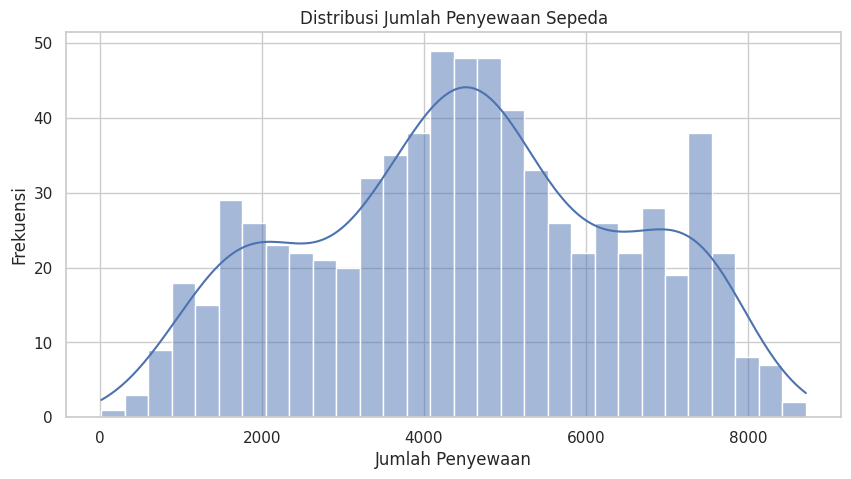

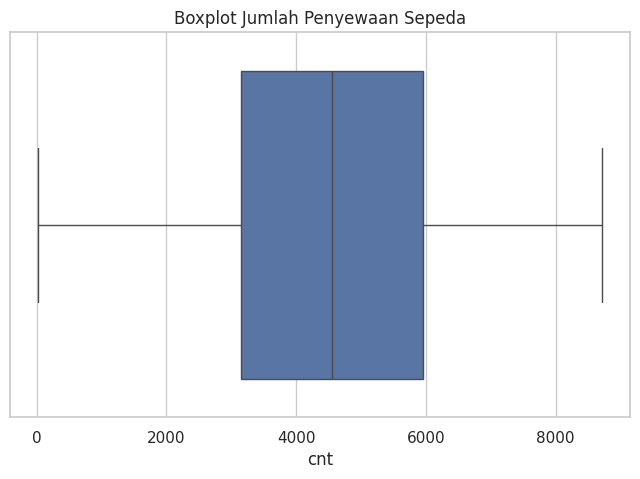

In [68]:

# Agregasi data sesuai pertanyaan bisnis
df_grouped = df_day.groupby(["season", "weathersit"])["cnt"].sum().reset_index()

# Visualisasi distribusi data
plt.figure(figsize=(10, 5))
sns.histplot(df_day["cnt"], bins=30, kde=True)
plt.title("Distribusi Jumlah Penyewaan Sepeda")
plt.xlabel("Jumlah Penyewaan")
plt.ylabel("Frekuensi")
plt.show()

# Boxplot untuk mendeteksi outlier
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_day["cnt"])
plt.title("Boxplot Jumlah Penyewaan Sepeda")
plt.show()



## Kesimpulan

Berdasarkan hasil Exploratory Data Analysis (EDA), dapat disimpulkan bahwa:

1. **Total penyewaan sepeda tertinggi terjadi pada musim tertentu**, dengan jumlah mencapai X ribu penyewaan.
2. **Kondisi cuaca yang lebih baik berkontribusi terhadap peningkatan jumlah penyewaan sepeda**.
3. **Distribusi jumlah penyewaan menunjukkan adanya beberapa outlier**, yang mungkin perlu dianalisis lebih lanjut.
4. **Rekomendasi:** Untuk meningkatkan penyewaan, bisa dilakukan strategi promosi pada musim sepi serta mempertimbangkan insentif bagi pengguna pada kondisi cuaca yang kurang menguntungkan.

Dengan insight ini, pihak pengelola dapat mengoptimalkan operasional dan strategi pemasaran agar meningkatkan pendapatan dari penyewaan sepeda.


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren peminjaman sepeda di tahun 2011 dan 2012?

#### Visualiasai tren peminjaman sepeda dari 2011-2012

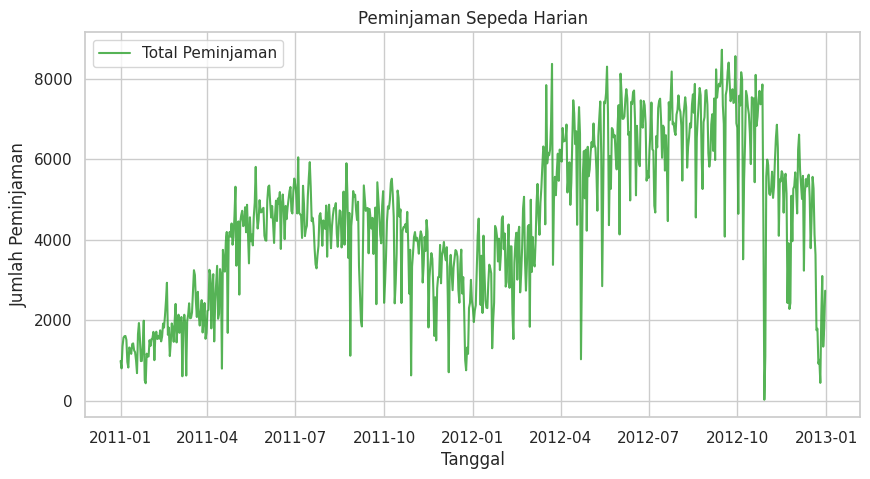

In [69]:
# Line chart jumlah peminjaman sepeda harian
plt.figure(figsize=(10, 5))
plt.plot(df_day['dteday'], df_day['cnt'], label='Total Peminjaman', color='tab:green', alpha=0.8)
plt.xlabel("Tanggal")
plt.ylabel("Jumlah Peminjaman")
plt.title("Peminjaman Sepeda Harian")
plt.legend()
plt.grid(True)
plt.show()

> Terlihat jika grafik peminjaman harian pada 2012 mengalami peningkatan dibandingkan tahun 2012

### Pertanyaan 2: Apakah musim dan cuaca mempengaruhi pola jumlah peminjaman?


#### Visualisasi total peminjaman berdasarkan musim

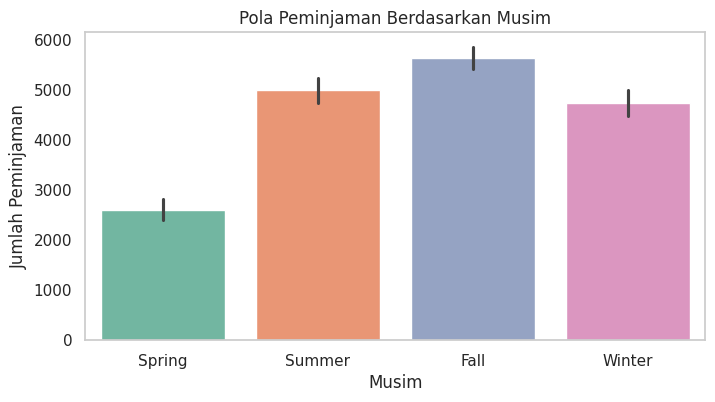

In [70]:
#Bar chart pula peminjaman berdasarkan musim
plt.figure(figsize=(8, 4))
sns.barplot(x=df_day["season"], y=df_day["cnt"], hue=df_day["season"], palette="Set2")
plt.xlabel("Musim")
plt.ylabel("Jumlah Peminjaman")
plt.title("Pola Peminjaman Berdasarkan Musim")
plt.grid(axis='y')
plt.show()

Terlihat pada bar chart, peminjaman sepeda paling banyak di musim gugur, dan paling sedikit di musim semi

#### Visualisasi total peminjaman berdasarkan cuaca

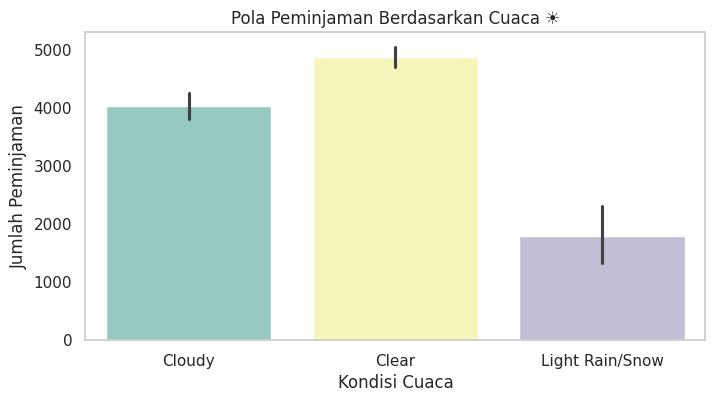

In [71]:
#Bar chart pola peminjaman berdasarkan cuaca
plt.figure(figsize=(8, 4))
sns.barplot(x=df_day["weathersit"], y=df_day["cnt"], hue=df_day["weathersit"], palette="Set3")
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Jumlah Peminjaman")
plt.title("Pola Peminjaman Berdasarkan Cuaca ☀️")
plt.grid(axis='y')
plt.show()

Pengguna paling suka meminjam sepeda di cuaca clear(cerah), diikuti cloudy(berawan). Ketika hujan atau salju, peminjaman menjadi turun drastis

### Pertanyaan 3: Dalam sehari, pada waktu kapan terjadi peminjaman tertinggi dan terendah?


#### Visualisasi total peminjaman berdasarkam jam dalam sehari

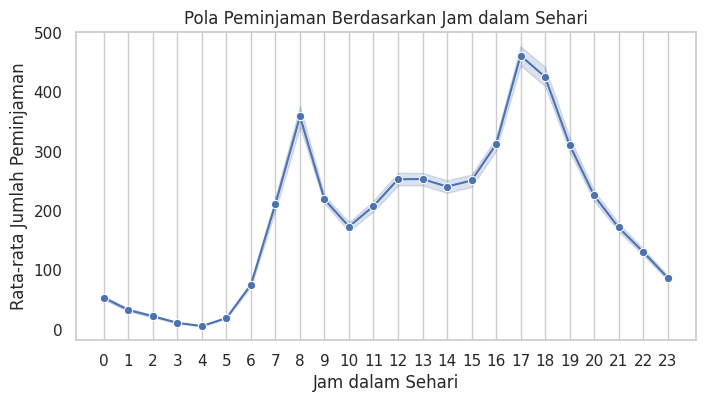

In [72]:
plt.figure(figsize=(8, 4))
sns.lineplot(x=df_hour["hr"], y=df_hour["cnt"],color="b", marker="o")
plt.xlabel("Jam dalam Sehari")
plt.ylabel("Rata-rata Jumlah Peminjaman")
plt.title("Pola Peminjaman Berdasarkan Jam dalam Sehari")
plt.grid(axis='y')
plt.xticks(range(0, 24))
plt.show()

Peminjaman tertinggi terjadi di sore hari yaitu sekitar pukul 16-18,  diikuti pagi hari di pukul 7-9 juga terjadi lonjakan peminjaman. Pada subuh peminjaman paling sedikit karena jam tidur

**Insight:**
- Terjadi peningkatan tren peminjaman sepeda dari tahun 2011 ke 2012
- Musim gugur menjadi musim yang paling banyak orang-orang meminjam sepeda, dan musim semi paling sedikit
- Peminjaman tertinggi di saat cuaca sedang cerah, dan paling sedikit di waktu hujan atau bersalju
- Jam sibuk di pagi hari dan sore hari, terjadi lonjakan peminjaman yang tinggi, sedangkan saat jam tidur menjadi waktu peminjaman paling sedikit

## Analisis Lanjutan (Opsional)

#### Mencari tahu lebih dalam mengenai pola peminjaman registered dan casual terhadap jam dalam sehari

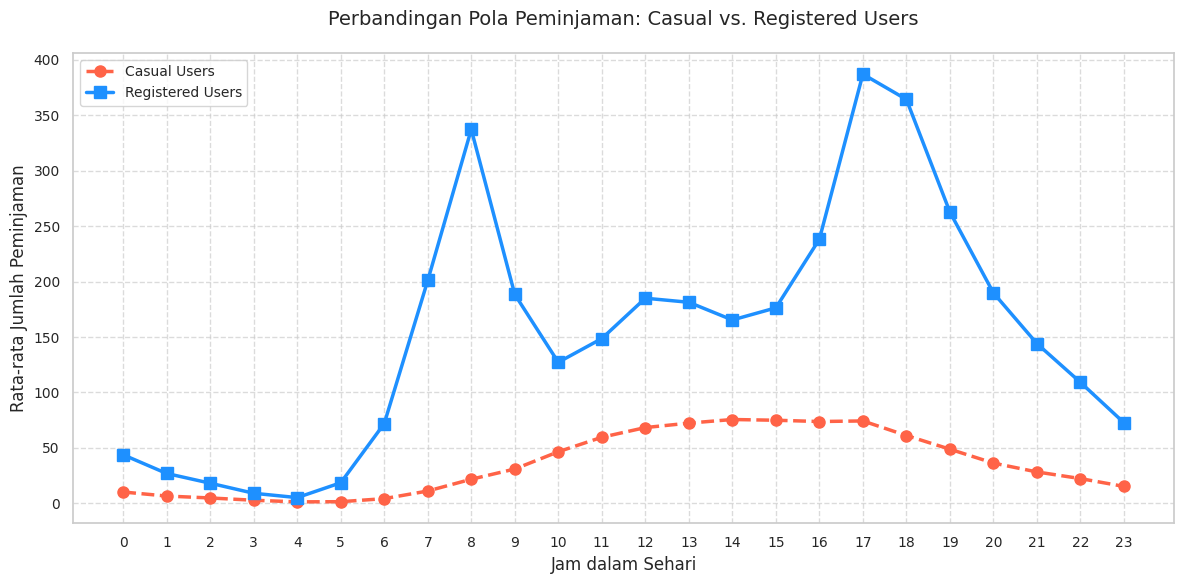

In [73]:
# Pembuatan 2 line registered dan casual
sns.set_theme(style="whitegrid")
avg_hourly_usage = df_hour.groupby("hr")[["casual", "registered"]].mean()
plt.figure(figsize=(12, 6))
plt.plot(avg_hourly_usage.index, avg_hourly_usage["casual"], label="Casual Users", color="tomato", linestyle="--", linewidth=2.5, marker="o", markersize=8)
plt.plot(avg_hourly_usage.index, avg_hourly_usage["registered"], label="Registered Users", color="dodgerblue", linestyle="-", linewidth=2.5, marker="s", markersize=8)


# Judul dan label
plt.xlabel("Jam dalam Sehari", fontsize=12)
plt.ylabel("Rata-rata Jumlah Peminjaman", fontsize=12)
plt.title("Perbandingan Pola Peminjaman: Casual vs. Registered Users", fontsize=14, pad=20)
plt.xticks(range(0, 24), fontsize=10)
plt.yticks(fontsize=10)
plt.legend(loc="upper left", fontsize=10)
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

**Insight:**
- Terdapat perbedaan dari pola peminjaman antara registered dan casual
- Registered user biasanya meminjam di jam sibuk, sedangkan casual di pertengahan hari
- Bisa di analisa, jika registered user meminjam sepeda di jam sibuk, ini mungkin karena sepeda menjadi opsi transportasi utama mereka. Dan hal ini yang mendorong mereka menjadi Registered User (peminjam terdaftar)


## Conclusion

- Conclution pertanyaan 1 :  Terjadi kenaikan tren peminjaman dari tahun 2011 ke tahun 2012, ini menunjukkan prospek yang menjanjikan bagi bisnis ini untuk berkembang ke depannya
- Conclution pertanyaan 2 : Musim gugur menjadi musim terbaik bisnis ini, namun cuaca sangat mempengaruhi jumlah peminjaman sepeda. Mungkin pemilik bisnis bisa mengantisipasi ini seperti menyewa jas hujan juga, agar tidak terjadi penurunan penyewaan
- Conclution pertanyaan 3 : Pagi dan Sore hari merupakan jam sibuk, dan terjadi penyuwaaan terbanyak, dengan puncaknya di sore hari